## Tarea Práctica 1
### Álgebra Lineal y Optimización para Data Science 2023/2

#### Integrantes: Sebastián Dinator, Joaquín Olivares, Benjamín Valdés.

### Ejercicio 3)

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch Glass Identification dataset
glass_identification = fetch_ucirepo(id=42)

# Extract features and targets
X = glass_identification.data.features
y = glass_identification.data.targets

# Explorar el conjunto de datos (opcional)
import pandas as pd
df = pd.DataFrame(data=X, columns=glass_identification.data.feature_names)
df['Target'] = y
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


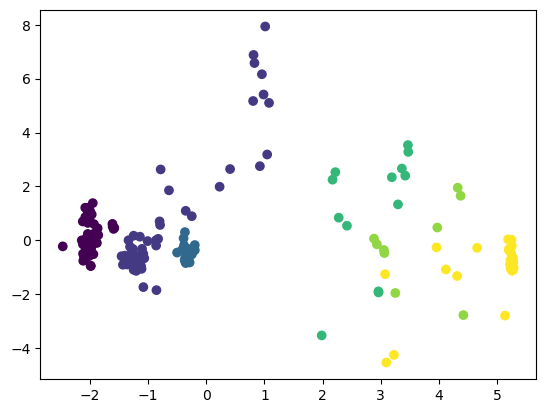

In [3]:
# Aplicar PCA para reducir la dimensionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Visualizar los datos
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y.values.ravel())
plt.show()

#### Ejercicio 3B)

c:\Users\sebad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sebad\AppData\Local\Temp\ipykernel_21348\2956482953.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[class_mask, 0], X_train_pca[class_mask, 1], c=class_colors[class_label], label=f'Class {class_label}')


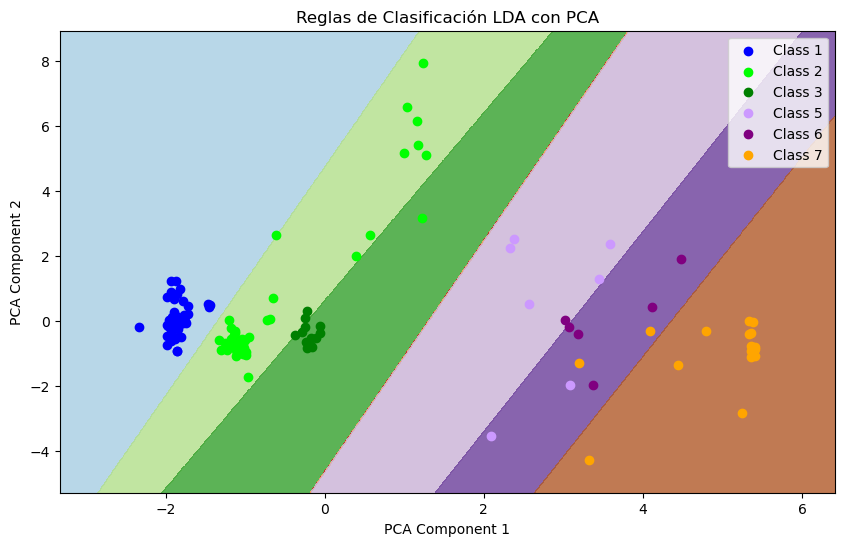

In [42]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)  # Cambia el número de componentes según sea necesario
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo LDA con PCA
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_train_pca, y_train)

# Visualización de las regiones de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = lda_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Mapear colores para las clases
class_colors = {1: 'blue', 2: (0.0, 1.0, 0.0), 3: 'green', 5: (0.8, 0.6, 1.0), 6: 'purple', 7: 'orange'}


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Dibujar puntos con colores consistentes
unique_classes = np.unique(y_train)
for class_label in unique_classes:
    class_mask = (y_train['Type_of_glass'] == class_label)
    plt.scatter(X_train_pca[class_mask, 0], X_train_pca[class_mask, 1], c=class_colors[class_label], label=f'Class {class_label}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Reglas de Clasificación LDA con PCA')
plt.legend()
plt.show()

La precisión del modelo LDA es aproximadamente de un 64.6% de las clasificaciones de nuestro conjunto de prueba.

#### Ejercicio 3C)

In [6]:
from sklearn.mixture import GaussianMixture

# Entrenar el modelo de Gaussian Mixture
gmm = GaussianMixture(n_components=2)  # Cambiar el número de componentes según sea necesario
gmm.fit(X_train)

# Predecir etiquetas de clase para el conjunto de prueba
y_pred_gmm = gmm.predict(X_test)

# Calcular precisión y matriz de confusión para GMM
accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
confusion_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)

# Imprimir métricas para GMM
print("Precisión del modelo GMM:", accuracy_gmm)
print("Matriz de Confusión para GMM:\n", confusion_matrix_gmm)

NameError: name 'X_train' is not defined

La precisión del modelo GMM es mucho más baja que la de LDA, con aproximadamente un 29.2%. Se predijo sólo una clase de todas las muestras del conjunto de prueba, por lo que se puede asumir que no pudo capturar la estructura de los datos correctamente.

Los resultados de LDA son mucho mejores que los de GMM, ya que LDA es un modelo de clasificación lineal, mientras que GMM es un modelo de clasificación no lineal. Por lo tanto, LDA es capaz de capturar la estructura de los datos, mientras que GMM no.

#### Ejercicio 3D)

Predicciones con LDA para 10 nuevas observaciones: [2 2 5 2 5 2 2 5 2 2]
Predicciones con GMM para 10 nuevas observaciones: [0 0 0 0 0 0 0 0 0 0]


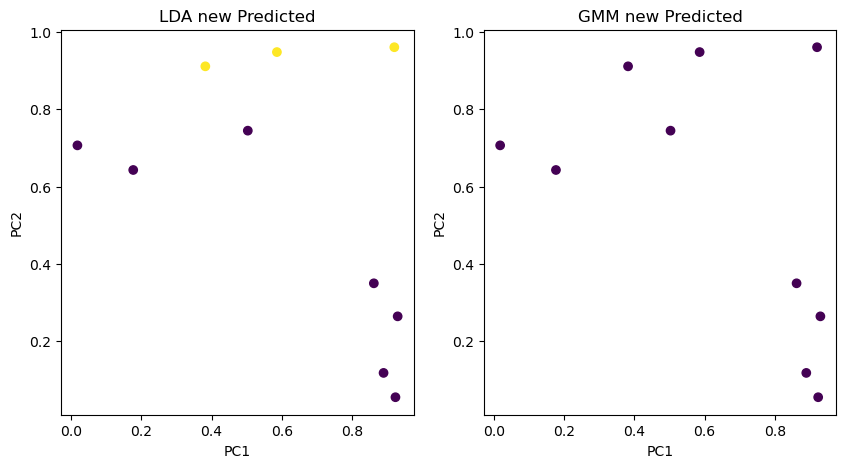

In [8]:
import numpy as np

# Generar 10 nuevas observaciones de prueba (cambiar según tus necesidades)
new_samples = np.random.rand(10, X.shape[1])

# Clasificar con LDA
y_new_pred_lda = lda.predict(new_samples)

# Clasificar con GMM
y_new_pred_gmm = gmm.predict(new_samples)

# Imprimir las predicciones
print("Predicciones con LDA para 10 nuevas observaciones:", y_new_pred_lda)
print("Predicciones con GMM para 10 nuevas observaciones:", y_new_pred_gmm)

# Graficar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("LDA new Predicted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(new_samples[:,0], new_samples[:,1], c=y_new_pred_lda)
plt.subplot(1,2,2)
plt.title("GMM new Predicted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(new_samples[:,0], new_samples[:,1], c=y_new_pred_gmm)
plt.show()

Tanto el modelo LDA como GMM asignan la misma etiqueta a todas las observaciones nuevas, por lo que se puede apreciar que ambos modelos no son capaces de clasificar correctamente las observaciones nuevas. Esto puede deberse a que los modelos no son capaces de capturar la estructura de los datos, o que los datos no son linealmente separables.